## **Import Modules**

In [80]:
import cv2
from cv2 import dnn_superres
from cv2 import imshow
import numpy as np

In [ ]:
# links to download models
# https://github.com/Saafke/EDSR_Tensorflow/blob/master/models/
# https://github.com/fannymonori/TF-LapSRN/blob/master/export/LapSRN_x8.pb

In [81]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install my_model

##**Original Image**

In [82]:
import cv2
from google.colab.patches import cv2_imshow

# Carregar a imagem
image = cv2.imread('/content/drive/MyDrive/SuperRes/test.jpg')

# Verificar se a imagem foi carregada corretamente
if image is None:
    print("Erro ao carregar a imagem. Verifique se o caminho do arquivo está correto.")
else:
    print("Imagem carregada com sucesso.")

Imagem carregada com sucesso.


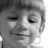

In [83]:
cv2_imshow(image)# Imagem original

## EDSR

In [84]:
from google.colab.patches import cv2_imshow

# initialize super resolution object
sr = dnn_superres.DnnSuperResImpl_create()

# read the model
path = '/content/drive/MyDrive/SuperRes/EDSR_x4.pb'
sr.readModel(path)

# set the model and scale
sr.setModel('edsr', 4)

In [85]:
# Verificar se a imagem foi carregada corretamente
if image is None:
    print("Erro ao carregar a imagem.")
else:
    # Upsample image
    upscaled = sr.upsample(image)

    # Verificar se a imagem upscaled foi criada corretamente
    if upscaled is not None:

        # Salvar a imagem upscaled
        cv2.imwrite('upscaled_test.jpg', upscaled)
        print("Imagem upscaled salva com sucesso.")
    else:
        print("Erro ao criar a imagem upscaled.")


Imagem upscaled salva com sucesso.


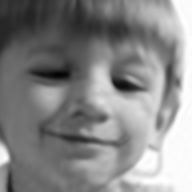

In [86]:
cv2_imshow(upscaled)# Image upscaled 4x

## **LapSRN_4x**

In [87]:
# read the model
path = '/content/drive/MyDrive/SuperRes/LapSRN_x4.pb'
sr.readModel(path)

# set the model and scale
sr.setModel('lapsrn', 4)

In [88]:
# Verificar se a imagem foi carregada corretamente
if image is None:
    print("Erro ao carregar a imagem.")
else:
    # Upsample da imagem
    upscaled_test = sr.upsample(image)

    # Verificar se a imagem upscaled foi criada corretamente
    if upscaled is not None:

        # Salvar a imagem upscaled
        cv2.imwrite('upscaled_test.jpg', upscaled)

        print("Imagem upscaled_test salva com sucesso.")
    else:
        print("Erro ao criar a imagem upscaled_test")


Imagem upscaled_test salva com sucesso.


In [89]:
# upsample the image
bicubic = sr.upsample(image)
# save the upscaled image
cv2.imwrite('upscaled_test.jpg', upscaled)

True

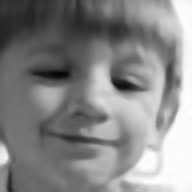

In [90]:
cv2_imshow(upscaled_test)# Image upscaled 4x with LapSRN_x4

##**Method Bicubic**

In [91]:
# Verificar se a imagem foi carregada corretamente
if image is None:
    print("Erro ao carregar a imagem.")
else:
    # Upsample da imagem
    upscaled_bicubic = sr.upsample(image)

    # Verificar se a imagem upscaled foi criada corretamente
    if upscaled is not None:

        # Salvar a imagem upscaled
        cv2.imwrite('upscaled_bicubic.jpg', upscaled)

        print("Imagem upscaled_bicubic salva com sucesso.")
    else:
        print("Erro ao criar a imagem upscaled_bicubic")

# traditional method - bicubic
bicubic = cv2.resize(image, (upscaled.shape[1], upscaled.shape[0]), interpolation=cv2.INTER_CUBIC)

# save the image
cv2.imwrite('upscaled_bicubic.jpg', bicubic)

Imagem upscaled_bicubic salva com sucesso.


True

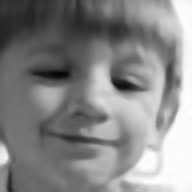

In [92]:
cv2_imshow(upscaled_bicubic) #Image upscaled 4x no metodo bicubic

## **LapSRN_8x**

In [93]:
# read the model
path = '/content/drive/MyDrive/SuperRes/LapSRN_x8.pb'
sr.readModel(path)

# set the model and scale
sr.setModel('lapsrn', 8)

In [23]:
'''# load the image
image = cv2.imread('test.jpg')'''

In [94]:
# Carregar a imagem
image = cv2.imread('/content/drive/MyDrive/SuperRes/test.jpg')


# Verificar se a imagem foi carregada corretamente
if image is None:
    print("Erro ao carregar a imagem.")
else:
    # Upsample da imagem
    upscaled_Lap_8x = sr.upsample(image)

    # Verificar se a imagem upscaled foi criada corretamente
    if upscaled is not None:

        # Salvar a imagem upscaled
        cv2.imwrite('upscaled_Lap_8x.jpg', upscaled)

        print("Imagem upscaled_Lap_8x salva com sucesso.")
    else:
        print("Erro ao criar a imagem upscaled_Lap_8x")

Imagem upscaled_Lap_8x salva com sucesso.


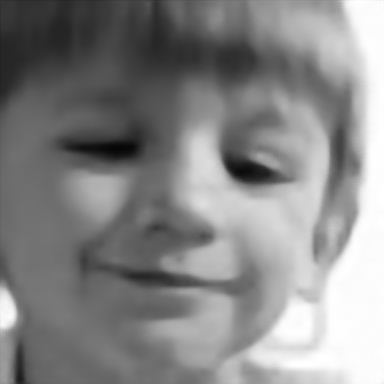

In [95]:
cv2_imshow(upscaled_Lap_8x)

##**Unblurred**

In [97]:
# Verificar se a imagem upscaled foi criada corretamente
if upscaled is not None:
    print("Image upscaled successfully created.")

    # Aplicar desfocagem para reduzir a falta de foco
    unblurred_test = cv2.blur(upscaled, (3, 3))  # Você pode ajustar o tamanho do kernel conforme necessário

    # Salvar a imagem desfocada
    cv2.imwrite('unblurred_test.jpg', unblurred_test)

    print("Image save with success.")
else:
    print("Fail to save image unblurred_test.jpg.")


Image upscaled successfully created.
Image save with success.


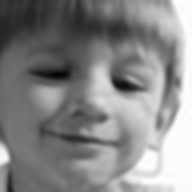

In [98]:
cv2_imshow(unblurred_test)

##**Unblur with Gaussian filter**

In [99]:
# Verificar se a imagem upscaled foi criada corretamente
if upscaled is not None:

    print("Image upscaled successfully created.")

    # Aplicar desfocagem para reduzir a falta de foco
    # Experimente diferentes tamanhos de kernel e tipos de filtro
    unblurred_test_2 = cv2.GaussianBlur(upscaled, (5, 5), 0)  # Exemplo com filtro gaussiano e kernel (5, 5)

    # Salvar a imagem desfocada
    cv2.imwrite('unblurred_test_2.jpg', unblurred_test_2)

    print("unblurred_test_2 save successfully.")
else:
    print("Erro ao criar a imagem upscaled_and_unblurred_test.jpg.")


Image upscaled successfully created.
unblurred_test_2 save successfully.


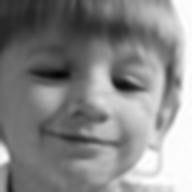

In [100]:
cv2_imshow(unblurred_test_2)

##**Unblur with fourier method**

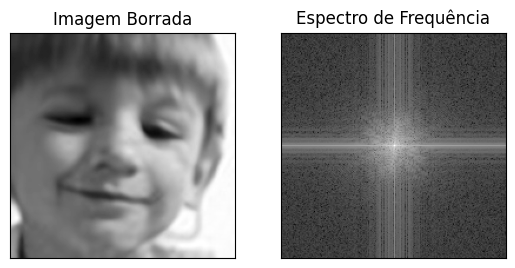

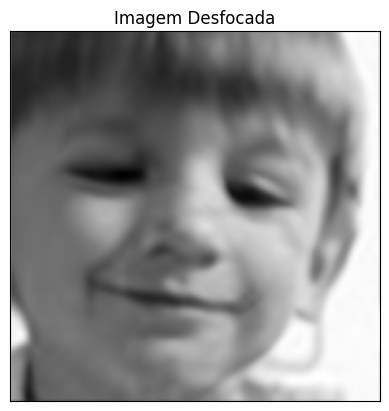

In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Blur image
imagem_borrada = cv2.imread('upscaled_Lap_8.jpg', 0)  # 0 para carregar em escala de cinza

# Calculate the Fourier Transform of the image.
fourier = np.fft.fft2(imagem_borrada)
fourier_shifted = np.fft.fftshift(fourier)  # Colocar as baixas frequências no centro

# Calculate the magnitude of the Fourier spectrum (frequency spectrum).
magnitude_spectrum = np.log(np.abs(fourier_shifted) + 1)  # Adicionar 1 para evitar log(0)

# Visualize the frequency spectrum.
plt.subplot(121), plt.imshow(imagem_borrada, cmap='gray')
plt.title('Imagem Borrada'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Espectro de Frequência'), plt.xticks([]), plt.yticks([])
plt.show()

# Adjust the parameters of the Gaussian filter.
tamanho_kernel = 15
desvio_padrao = 5

# Apply a Gaussian filter to enhance the high frequencies.
filtro_gaussiano = cv2.getGaussianKernel(tamanho_kernel, desvio_padrao)
filtro_gaussiano_2D = np.outer(filtro_gaussiano, filtro_gaussiano)  # 2D kernel

# Redimensionar o filtro gaussiano 2D para o mesmo tamanho que o espectro de Fourier
#The goal is for both to have the same dimensions.
filtro_gaussiano_2D = cv2.resize(filtro_gaussiano_2D, (fourier_shifted.shape[0], fourier_shifted.shape[1]))

# Resize the 2D Gaussian filter to the same size as the Fourier spectrum
filtro_aplicado = fourier_shifted * filtro_gaussiano_2D

# Calculate the Inverse Fourier Transform
imagem_desfocada = np.fft.ifft2(np.fft.ifftshift(filtro_aplicado))
imagem_desfocada = np.abs(imagem_desfocada)

# Visualize the blurred image.
plt.imshow(imagem_desfocada, cmap='gray')
plt.title('Imagem Desfocada'), plt.xticks([]), plt.yticks([])
plt.show()